<a href="https://colab.research.google.com/github/AgustinBustos/pca_and_neuralNets/blob/main/pca_and_neuralNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA and Neural Nets



while trying to cluster costumers opinions on certain elements (credit cards features) i came up with a nice model that later could replicate results similar to the pca analysis. Maybe this is a first translation of the pca model to the nn world, or maybe there is some kind of duality, nevertheless, my intuition tells me that in the long run this kind of translations of ml models to the nn way of thinking can give us future generalizations or connections thanks to the flexibility of nn models. <br/>

 It shouldnt be necessary to clarify that this and every model in my github repos surely exists and even probably since 50 or 70 or 100 years ago, but im simply not aware of their existence because i dont read or search a lot about the topic.  

# Pre Proccess

the following 16 cells are not important.

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np

cGrad=px.colors.sequential.algae

In [2]:
df=pd.read_excel('https://github.com/AgustinBustos/creditCardSurvey/blob/ab5676298a45bc2e78b7930d5cf1f1b600bf7b95/Test%20-%20Matrix.xlsm?raw=True',index_col=[0,1])
df1=df[1:]
df1.reset_index(inplace=True)


In [3]:
df1['usualDebt']=np.nan
df1.loc[df1['Q03']=='Zero','usualDebt']=0
df1.loc[df1['Q03']=='Less than $500','usualDebt']=0.25
df1.loc[df1['Q03']=='$501 to $1,000','usualDebt']=0.75
df1.loc[df1['Q03']=='$1,001 to $2,000','usualDebt']=1.5
df1.loc[df1['Q03']=='$2,001 to $3,000','usualDebt']=2.5
df1.loc[df1['Q03']=='$3,001 to $4,000','usualDebt']=3.5
df1.loc[df1['Q03']=='$4,001 to $5,000','usualDebt']=4.5
df1.loc[df1['Q03']=='$5,001 to $7,000','usualDebt']=6
df1.loc[df1['Q03']=='$7,001 to $10,000','usualDebt']=8.5
df1.loc[df1['Q03']=='More than $10,000','usualDebt']=11



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [4]:
df1['income']=np.nan
df1.loc[df1['D11']=='Below $25,000','income']=2
df1.loc[df1['D11']=='Between $25,000 and $49,999','income']=3.75
df1.loc[df1['D11']=='Between $50,000 and $74,999','income']=6.25
df1.loc[df1['D11']=='Between $75,000 and $99,999','income']=8.75
df1.loc[df1['D11']=='More than $100,000','income']=11



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [5]:
df1['monthIncome']=(df1['income']*10000)/12
df1['monthDebt']=df1['usualDebt']*1000
df1['debt/income']=df1['monthDebt']/df1['monthIncome']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [6]:
df2=df1.copy()
df2.loc[df2['Q01_3']==0,'Q01_3']='Non User'
df2.loc[df2['Q01_3']=='Non User','Q03']='Non User'
df2['monthly_income']=df2['income']*(10000/12)
tograph=df2[['Q01_3', 'Q03','weight','monthly_income']]
tograph.loc[tograph['monthly_income'].isnull(),'monthly_income']=2000
tograph.dropna(inplace=True)



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [7]:
tograph=df2[['Q01_3', 'Q03','weight','D11','monthly_income','debt/income']]
tograph.loc[tograph['monthly_income'].isnull(),'monthly_income']=2000
tograph.loc[tograph['debt/income'].isnull(),'debt/income']=0
tograph.loc[tograph['D11'].isnull(),'D11']='No Info'
tograph.dropna(inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [8]:

tograph['middle']='Zero'
tograph.loc[tograph['Q03'].isin(['Less than $500','$501 to $1,000','$1,001 to $2,000']),'middle']='less than $2000'
tograph.loc[tograph['Q03'].isin(['$2,001 to $3,000','$3,001 to $4,000','$4,001 to $5,000']),'middle']='between $2001 and $5,000'
tograph.loc[tograph['Q03'].isin(['$5,001 to $7,000','$7,001 to $10,000','More than $10,000']),'middle']='more than $5,001'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
tograph['middle']='Zero'
tograph.loc[tograph['Q03'].isin(['Less than $500','$501 to $1,000','$1,001 to $2,000']),'middle']='less than $2000'
tograph.loc[tograph['Q03'].isin(['$2,001 to $3,000','$3,001 to $4,000','$4,001 to $5,000']),'middle']='between $2001 and $5,000'
tograph.loc[tograph['Q03'].isin(['$5,001 to $7,000','$7,001 to $10,000','More than $10,000']),'middle']='more than $5,001'

tograph.loc[tograph['Q03']=='Non User','Q03']='otro'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [10]:
tograph['debtDummy']='debt to pay'
tograph.loc[tograph['D11']=='No Info','debtDummy']='Zero Debt'
tograph.loc[tograph['D11']=='No Info','D11']='No Info Necessary'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [11]:
grapho=df2[['Q05','Q01_3','weight','monthDebt','Q12_1','Q12_2','Q12_3','Q12_4','Q12_5','Q12_6','Q12_7','Q12_8','Q12_9']]
grapho=grapho.loc[grapho['Q12_9'].notnull()]
grapho['count']=(grapho['weight']/10000).astype(int)
def reindex_df(df, weight_col):
    """expand the dataframe to prepare for resampling
    result is 1 row per count per sample"""
    df = df.reindex(df.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

expGraph0 = reindex_df(grapho, weight_col = 'count')
expGraph0.shape


(12735, 14)

In [12]:
def createColumn(newname,columnName):
  expGraph0[newname]=1
  expGraph0.loc[expGraph0[columnName]=='Slightly important',newname]=2
  expGraph0.loc[expGraph0[columnName]=='Somewhat important',newname]=3
  expGraph0.loc[expGraph0[columnName]=='Very important',newname]=4
  expGraph0.loc[expGraph0[columnName]=='Extremely important',newname]=5

In [13]:
createColumn('costumer service','Q12_1')
createColumn('safety','Q12_2')
createColumn('app','Q12_3')
createColumn('BNPL','Q12_4')
createColumn('interest rates','Q12_5')
createColumn('rewards program','Q12_6')
createColumn('educational tools to improve credit scores','Q12_7')
createColumn('easy in improving credit score','Q12_8')
createColumn('easy in improving credit score of child added','Q12_9')

In [14]:
toJoy=expGraph0[['costumer service','safety','app','BNPL','interest rates','rewards program','educational tools to improve credit scores','easy in improving credit score','easy in improving credit score of child added']]
stackedJoy=pd.DataFrame(toJoy.stack())
stackedJoy.reset_index(inplace=True)
stackedJoy.drop('level_0',axis=1,inplace=True)
stackedJoy.rename(columns={'level_1':'separator',0:'intensity'},inplace=True)
expGraph0['count2']=(expGraph0['monthDebt']/1000).astype(int)

In [15]:
stackedJoy.loc[stackedJoy['separator']=='easy in improving credit score of child added','separator']='1. easy in improving credit score of child added'
stackedJoy.loc[stackedJoy['separator']=='BNPL','separator']='2. BNPL'
stackedJoy.loc[stackedJoy['separator']=='educational tools to improve credit scores','separator']='3. educational tools to improve credit scores'
stackedJoy.loc[stackedJoy['separator']=='app','separator']='4. app'
stackedJoy.loc[stackedJoy['separator']=='easy in improving credit score','separator']='5. easy in improving credit score'
stackedJoy.loc[stackedJoy['separator']=='costumer service','separator']='6. costumer service'
stackedJoy.loc[stackedJoy['separator']=='interest rates','separator']='7. interest rates'
stackedJoy.loc[stackedJoy['separator']=='rewards program','separator']='8. rewards program'
stackedJoy.loc[stackedJoy['separator']=='safety','separator']='9. safety'

In [16]:
stackedJoy['group']=1

stackedJoy.loc[stackedJoy['separator']=='2. BNPL','group']=2
stackedJoy.loc[stackedJoy['separator']=='3. educational tools to improve credit scores','group']=2
stackedJoy.loc[stackedJoy['separator']=='4. app','group']=2
stackedJoy.loc[stackedJoy['separator']=='5. easy in improving credit score','group']=2

stackedJoy.loc[stackedJoy['separator']=='6. costumer service','group']=3

stackedJoy.loc[stackedJoy['separator']=='7. interest rates','group']=4
stackedJoy.loc[stackedJoy['separator']=='8. rewards program','group']=4
stackedJoy.loc[stackedJoy['separator']=='9. safety','group']=4


# Data




In a survey, people where asked to rate from 1 to 5 the importance of 9 credit card features:


In [17]:
toJoy

,costumer service,safety,app,BNPL,interest rates,rewards program,educational tools to improve credit scores,easy in improving credit score,easy in improving credit score of child added
0,4,5,4,4,5,5,5,5,1
1,4,5,4,4,5,5,5,5,1
2,4,5,4,4,5,5,5,5,1
3,4,5,4,4,5,5,5,5,1
4,4,5,4,4,5,5,5,5,1
...,...,...,...,...,...,...,...,...,...
12730,1,3,1,1,1,4,4,4,1
12731,1,3,1,1,1,4,4,4,1
12732,5,5,5,5,4,5,4,4,4
12733,5,5,5,5,4,5,4,4,4


<h2>It is possible to visualize a joyplot of the remaining distributions

In [18]:
!pip install cmocean
!pip install joypy
from joypy import joyplot
import matplotlib.pyplot as plt
from matplotlib import cm
import cmocean
import matplotlib

     |████████████████████████████████| 223 kB 5.4 MB/s 


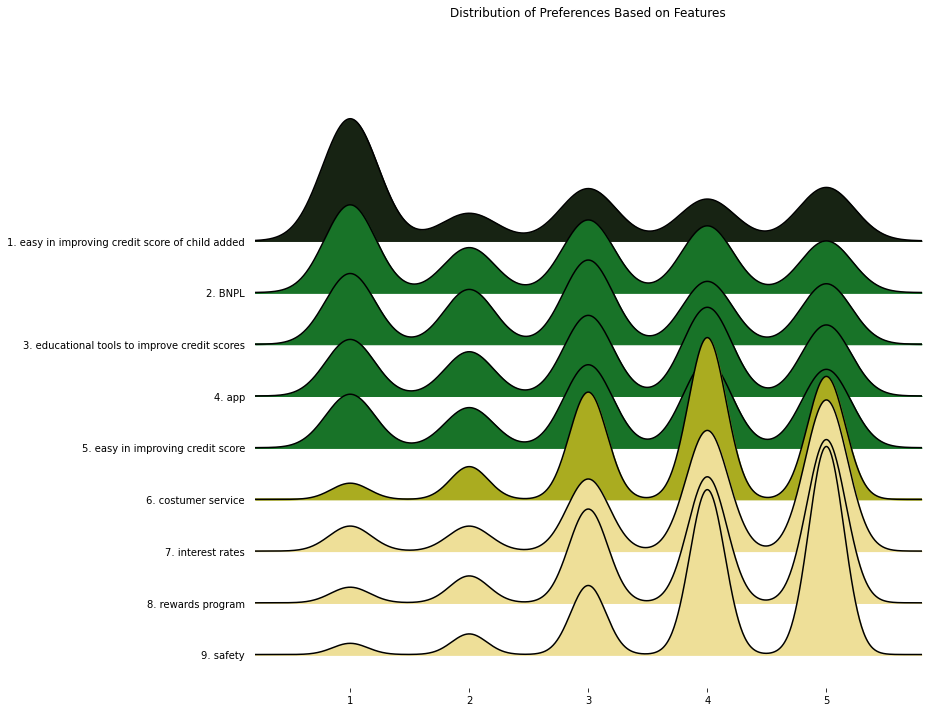

In [19]:
#@title joyPlot
norm = plt.Normalize(stackedJoy["group"].min(), stackedJoy["group"].max())
ar=np.array([4,3,3,3,3,2,1.3,1.3,1.3])
original_cmap2 = cmocean.cm.speed
cmap = matplotlib.colors.ListedColormap(original_cmap2(norm(ar)))

joyplot(stackedJoy, by = 'separator', column = 'intensity',colormap=cmap,
        
        range_style='own', figsize = (13,10),
        title = 'Distribution of Preferences Based on Features',
        overlap = 4)
plt.show()

# PCA and Clusters



My objective from now on is to clusterize the 9 distributions, i mean its easy to see that there are 4 types of 'opinions' if we differenciate them by the form of the distribution they belong to, lets try to validate this using pca analysis:

In [20]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [21]:
toGetden=toJoy.to_numpy().transpose()
print(np.histogram(toGetden[0],bins=[1,2,3,4,5,6],density=True)[0])
np.histogram(toGetden[1],bins=[1,2,3,4,5,6],density=True)[0]
densities=np.stack([np.histogram(toGetden[i],bins=[1,2,3,4,5,6],density=True)[0] for i in range(9)])

[0.03674912 0.07428347 0.24326659 0.36686298 0.27883785]


In [22]:
reduced_data = PCA(n_components=2).fit_transform(densities)

kmeans = KMeans(n_clusters=4)
kmeans.fit(reduced_data)


KMeans(n_clusters=4)

In [23]:
#@title clusters over first 2 components
toScatter=pd.DataFrame({'x':reduced_data.transpose()[0],'y':reduced_data.transpose()[1],'cluster':kmeans.labels_,'label':['costumer service', 'safety', 'app', 'BNPL', 'interest rates',
       'rewards program', 'educational tools to improve credit scores',
       'easy in improving credit score',
       'easy in improving credit score of child added']})

fig=px.scatter(toScatter,x='x',y='y',template='presentation')
opac=0.3

fig.add_shape(type="rect",
    xref="x", yref="y",
    x0=0, y0=0,
    x1=0.33, y1=0.127,
    opacity=opac,
    fillcolor=cGrad[0],
    line_color=cGrad[0],
)
fig.add_shape(type="rect",
    xref="x", yref="y",
    x0=0, y0=0,
    x1=0.33, y1=-0.127,
    opacity=opac,
    fillcolor=cGrad[3],
    line_color=cGrad[3],
)
fig.add_shape(type="rect",
    xref="x", yref="y",
    x0=0, y0=0,
    x1=-0.27, y1=-0.127,#
    opacity=opac,
    fillcolor=cGrad[6],
    line_color=cGrad[6],
)
fig.add_shape(type="rect",
    xref="x", yref="y",
    x0=0, y0=0,
    x1=-0.27, y1=0.127,
    opacity=opac,
    fillcolor=cGrad[9],
    line_color=cGrad[9],
)
fig.add_annotation(text=toScatter.loc[0,'label'],
                  xref='x', yref="y",
                  x=toScatter.loc[0,'x'], y=toScatter.loc[0,'y']+0.01, showarrow=False)
fig.add_annotation(text=toScatter.loc[1,'label'],
                  xref='x', yref="y",
                  x=toScatter.loc[1,'x'], y=toScatter.loc[1,'y']+0.01, showarrow=False)
fig.add_annotation(text=toScatter.loc[2,'label'],
                  xref='x', yref="y",
                  x=toScatter.loc[2,'x'], y=toScatter.loc[2,'y']-0.007, showarrow=False)
fig.add_annotation(text=toScatter.loc[3,'label'],
                  xref='x', yref="y",
                  x=toScatter.loc[3,'x'], y=toScatter.loc[3,'y']+0.01, showarrow=False)
fig.add_annotation(text=toScatter.loc[4,'label'],
                  xref='x', yref="y",
                  x=toScatter.loc[4,'x'], y=toScatter.loc[4,'y']+0.01, showarrow=False)
fig.add_annotation(text=toScatter.loc[5,'label'],
                  xref='x', yref="y",
                  x=toScatter.loc[5,'x'], y=toScatter.loc[5,'y']+0.011, showarrow=False)
fig.add_annotation(text=toScatter.loc[7,'label'],
                  xref='x', yref="y",
                  x=toScatter.loc[7,'x'], y=toScatter.loc[7,'y']+0.0105, showarrow=False)


fig.add_annotation(text=toScatter.loc[8,'label'],
                  xref='x', yref="y",
                  x=toScatter.loc[8,'x']-0.005, y=toScatter.loc[8,'y']-0.002,
                  axref='pixel',ayref='pixel',
                  ax=-135,ay=50,showarrow=True)

fig.add_annotation(text=toScatter.loc[6,'label'],
                  xref='x', yref="y",
                  x=toScatter.loc[6,'x']+0.0028, y=toScatter.loc[6,'y']-0.0038,
                  axref='pixel',ayref='pixel',
                  ax=30,ay=50,showarrow=True)


fig.update_layout(title='PCA of Preference Distributions')


fig.show()


# Neural Nets

As always we import pytorch, define mse, and the third cell constructs the input of the model. <br/>

First we are going to one hot encode the 9 distributions, the input of the model is going to be the cartesian product of this encoding. What i mean by this is that we are going to feed 2 distributions at a time for example the distribution of opinion on the interest rate and the distribution of opinion on BNLP has the form [0,0,0,1,0,0,0,0,0], [0,0,0,0,0,0,0,1,0]. We feed 2 vectors, the kronecker product has the goal of making the rows necessary to feed every combination of the 2 vectors.



In [24]:
import torch

In [25]:
def mse(t1,t2):
  diff = t1 - t2
  return torch.sum(diff * diff) / diff.numel()

In [26]:
toOneHot=torch.eye(9)
bDensity=torch.kron(torch.ones([9,1]),toOneHot)
aDensity=torch.kron(toOneHot,torch.ones([9,1]))


Second, we are going to work with the distributions values. Every row represents a feature (9 rows) and every column a rating (5 columns).

In [27]:
toGetden=toJoy.to_numpy().transpose()
np.histogram(toGetden[1],bins=[1,2,3,4,5,6],density=True)[0]
densities=np.stack([np.histogram(toGetden[i],bins=[1,2,3,4,5,6],density=True)[0] for i in range(9)])
fds=torch.from_numpy(densities).float()
fds

tensor([[0.0367, 0.0743, 0.2433, 0.3669, 0.2788],
        [0.0236, 0.0435, 0.1457, 0.3480, 0.4391],
        [0.1658, 0.1297, 0.2363, 0.2600, 0.2082],
        [0.2711, 0.1388, 0.2243, 0.2062, 0.1595],
        [0.0635, 0.0634, 0.1830, 0.3063, 0.3837],
        [0.0367, 0.0632, 0.2204, 0.2961, 0.3836],
        [0.2123, 0.1646, 0.2528, 0.1887, 0.1816],
        [0.1566, 0.1174, 0.2430, 0.2536, 0.2294],
        [0.4111, 0.0927, 0.1759, 0.1406, 0.1797]])

With the densities of the distributions, it is possible to define a 'distance' between every pair of distributions. My intuition of this distance comes from the lp spaces: <br/>
<br/>
$distance(d_1,d_2) = \int_{-\infty}^{\infty}|d_1\ (x)-d_2\ (x)|^2\ dx$
<br/><br/>
Where d1 and d2 are distributions of two different features; in practice, we can use the norm of the 2 vectors because the distributions are discrete. 


In [28]:
y=torch.norm((aDensity @ fds)-(bDensity @ fds),dim=1)

The model wants to simplify this distance function, first we create an euclidean representation of the 9 distributions, by this i mean every distribution now corresponds to a point in R^n, and then we take the norm between two points to approximate the distance function.<br/> It is trivial that as n gets to infinity, the model starts to overfit, and in this particular case (because we have 5 types of ratings) the model perfectly overfits at n=5.

The visualization of the net is one of the most important features of the nn theory, it lets us create new models using the intuitions in previous literature, so in this case we have two input vectors of lenght 9 (the one hot encoded distribution pairs) a hidden layer of lenght 2*2 (beacause we want to make the representation in a 2d space) and an output layer of 1 dimension making a prediction of the real distance between the distribution pair:



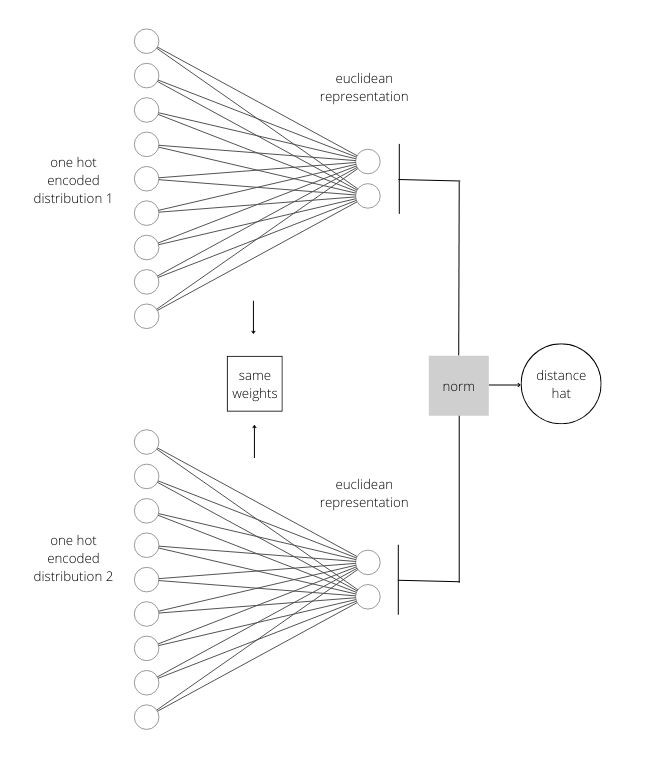


In [29]:
dim=2

euclidRep=torch.randn([9,dim],requires_grad=True)
def model(ad,bd):
  return torch.norm((ad @ euclidRep)-(bd @ euclidRep),dim=1)

model(aDensity,bDensity)

tensor([0.0000, 4.0433, 1.6160, 2.2904, 1.4923, 1.8680, 2.7793, 0.7605, 3.1419,
        4.0433, 0.0000, 3.4575, 3.3024, 2.6653, 2.7871, 3.0680, 3.2838, 1.5033,
        1.6160, 3.4575, 0.0000, 0.6810, 1.9092, 2.5651, 3.5976, 1.3336, 3.1940,
        2.2904, 3.3024, 0.6810, 0.0000, 2.3358, 2.9987, 4.0073, 1.9198, 3.3460,
        1.4923, 2.6653, 1.9092, 2.3358, 0.0000, 0.6641, 1.6899, 0.8260, 1.6504,
        1.8680, 2.7871, 2.5651, 2.9987, 0.6641, 0.0000, 1.0342, 1.3706, 1.4724,
        2.7793, 3.0680, 3.5976, 4.0073, 1.6899, 1.0342, 0.0000, 2.3865, 1.5649,
        0.7605, 3.2838, 1.3336, 1.9198, 0.8260, 1.3706, 2.3865, 0.0000, 2.4538,
        3.1419, 1.5033, 3.1940, 3.3460, 1.6504, 1.4724, 1.5649, 2.4538, 0.0000],
       grad_fn=<CopyBackwards>)

lets train the model

In [30]:

epochNum=3000
optimizer = torch.optim.Adam([euclidRep], lr=0.01)#w1,b1
trainError=[]

for epoch in range(epochNum):  
    yhat = model(aDensity,bDensity)
    loss = mse(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    trainError.append(mse(model(aDensity,bDensity),y).item())
    

   


print(mse(model(aDensity,bDensity),y))
px.line(x=[t for t in range(epochNum)],
        y=trainError).show()


tensor(6.7974e-05, grad_fn=<DivBackward0>)


In [45]:
height=torch.mean(euclidRep,dim=0)[1]
xFrom=torch.min(euclidRep,dim=0)[0][0].item()
xTo=torch.max(euclidRep,dim=0)[0][0].item()
euclidRep

tensor([[-0.0456, -0.3037],
        [-0.0310, -0.4942],
        [-0.2258, -0.2479],
        [-0.3554, -0.2242],
        [-0.0826, -0.4176],
        [-0.0978, -0.4382],
        [-0.2951, -0.1944],
        [-0.2187, -0.2706],
        [-0.5078, -0.2859]], requires_grad=True)

Once the model is trained, we plot the hidden layer. We can see that, even though the points are in a different part of the domain, the relative distances seem to be on par with the PCA model, and so if we a apply a clustering algo, we should get the same groups:<br/>


In [32]:
#@title representations plot
toplot=euclidRep.t().detach().numpy()

toplotPD=pd.DataFrame({'x':toplot[0],'y':toplot[1],'label':['costumer service', 'safety', 'app', 'BNPL', 'interest rates',
       'rewards program', 'educational tools to improve credit scores',
       'easy in improving credit score',
       'easy in improving credit score of child added']})


px.scatter(toplotPD,x='x',y='y',color='label',template='presentation').show()

The interesting thing is that its possible to expand the model in a lot of interesting ways, for example, what if we put another hidden layer and an activation function?
<br/>
The result would be that now instead of doing a representation over a plain space we will be doing it over a curved space, and maybe it would lower the error of the distance prediction without overfitting a lot, i mean, the problem of putting a new dimension is that it tends to overfitt the model a lot, thats one of the reasons we use more than one hidden layer.

## from representation to reality

We have already represented the distributions on the plane, it should be possible to argue that now the axes on the plane are some kind of psicologycal generators when it comes to the peoples opinion on the features. <br/>
Lets take the normal distribution as an example of science (i dont know anything of what im going to say in this pharagraph), in physics there are a lot of particles collitions and so on, and at first sight it should be impossible to predict the outcome of the millions of collitions that happens between them, but thats when the normal distribution appears, by some simmetries of probabilities or something, it is possible to restrict the outcome of all those collitions to a distribution that is only generated by 2 parameters (mu and sigma). And that restriction or simplification is what makes it science, with only those two parameters we can know the set of all possible outcomes. <br/>
Making an extrapolation to psicology, there are lots of neuron firing (similar to the particle collitions) in our brain when trying to answer the survey; but maybe we have the hope of making a scientifical prediction in the sense that there is an analytical distribution (analog to the normal distribution) that may predict the outcome or form of the real distribution of the survey; if thats the case, we can argue that the axes of the euclidean representation are the generators of the set of those analytical distributions (analog to mu and sigma in the normal example), but more so we can generate the set of those analytical distributions, we can visualize them for further study. <br/>
To summarize we are going to obtain the inverse of the euclidean representation, now the input of the model is going to be a vector on the plane, and the model is going to try to get the represented distribution.

We are going to get the represeted distribution of an horizontal set, thats the same as seeing set of normal distributions with similar mean and different deviations 

In [46]:
rowQ=100
psicoSet=torch.rand([rowQ,dim])
psicoSet=psicoSet+torch.tensor([-0.5,-0.5])
psicoSet=psicoSet*torch.tensor([0,0.45])+torch.tensor([0.07,height])  #height era 0.35

psicoSet=torch.stack([torch.tensor([0.07 for i in range(rowQ)]),torch.linspace(0.18, 0.56, rowQ)]).t()
psicoSet=torch.stack([torch.linspace(xFrom, xTo, rowQ),torch.tensor([height for i in range(rowQ)])]).t()  #era-0.17 a 0.25

#deslizador
hj=psicoSet.t().detach().numpy()

hjPD=pd.DataFrame({'x':hj[0],'y':hj[1]})
px.scatter(hjPD,x='x',y='y').show()


The input of the model is a 2d vector, but now that we have the positions of the other distributions in the plane, we know the distance between the input vector and all the other 9 points by taking the norm; our new objective is going to be to generate a distribution that preserves those 9 distances as good as possible when applying the integral of the square difference formula explained before. We are getting the inverse of the representations.

In [47]:
#new y
toOneHot1=torch.eye(9)
bDensity1=torch.kron(torch.ones([rowQ,1]),torch.eye(9))
aDensity1=torch.kron(torch.eye(rowQ),torch.ones([9,1]))

newy=torch.norm((aDensity1 @ psicoSet)-(bDensity1 @ euclidRep),dim=1)
newy=newy.detach()


We are going to train 5 parameters per vector, because this distribution has only 5 possibilities.

In [48]:


euclidRepInference=torch.rand([rowQ,5],requires_grad=True)
def model1(ad,bd):
  return torch.norm((ad @ euclidRepInference)-(bd @ fds),dim=1)



tensor([1.1573, 1.2033, 1.0421, 0.9864, 1.1589, 1.1800, 1.0040, 1.0594, 0.9755,
        1.1363, 1.1435, 1.0051, 0.9372, 1.0980, 1.1193, 0.9534, 1.0153, 0.8820,
        0.6738, 0.7791, 0.6068, 0.5717, 0.7203, 0.7217, 0.6025, 0.6105, 0.5709,
        0.8785, 0.8438, 0.8089, 0.7860, 0.8106, 0.8149, 0.7830, 0.7989, 0.7407,
        1.3269, 1.3935, 1.2610, 1.2276, 1.3491, 1.3503, 1.2400, 1.2658, 1.2203,
        1.3786, 1.4879, 1.3366, 1.3218, 1.4462, 1.4464, 1.3309, 1.3490, 1.3661,
        0.2971, 0.3908, 0.3598, 0.4303, 0.3689, 0.3781, 0.4329, 0.3624, 0.5373,
        0.7129, 0.7528, 0.7385, 0.7951, 0.7199, 0.6833, 0.7433, 0.7214, 0.8796,
        1.3928, 1.4607, 1.3251, 1.2963, 1.4218, 1.4297, 1.3061, 1.3368, 1.3115,
        0.7374, 0.6827, 0.7628, 0.7874, 0.6901, 0.7034, 0.7998, 0.7517, 0.7802,
        1.1537, 1.1916, 1.0454, 1.0045, 1.1392, 1.1406, 0.9927, 1.0507, 1.0021,
        0.8850, 0.9783, 0.8859, 0.9180, 0.9561, 0.9601, 0.9071, 0.9010, 1.0256,
        1.2720, 1.2722, 1.2529, 1.2702, 

In [49]:

epochNum=10000
optimizer1 = torch.optim.Adam([euclidRepInference], lr=0.01)#w1,b1
trainError=[]

for epoch in range(epochNum):  
    yhat = model1(aDensity1,bDensity1)
    loss = mse(yhat, newy)
    optimizer1.zero_grad()
    loss.backward()
    optimizer1.step()

    trainError.append(mse(model1(aDensity1,bDensity1),newy).item())
    

   


print(mse(model1(aDensity1,bDensity1),newy))
px.line(x=[t for t in range(epochNum)],
        y=trainError).show()


tensor(4.2215e-05, grad_fn=<DivBackward0>)


Now we graph the distributions as we slide the x parameter

In [50]:
lineGraph=euclidRepInference.detach().numpy()
toto=pd.DataFrame(lineGraph)
toto=pd.DataFrame(toto.stack())
toto.reset_index(inplace=True)
toto.rename(columns={'level_0':'slide','level_1':'img',0:'density'},inplace=True)
toto

,slide,img,density
0,0,0,0.410859
1,0,1,0.075162
2,0,2,0.178188
3,0,3,0.127589
4,0,4,0.208075
...,...,...,...
495,99,0,0.024759
496,99,1,0.079316
497,99,2,0.226829
498,99,3,0.375666


In [51]:

px.line(toto,x='slide',y='density',color='img').show()

Finally we can start to analyse the set of distributions represented by a slide of the x axis.

In [52]:
toto['count']=(toto['density']*100).astype(int)


def reindex_df(df, weight_col):
    """expand the dataframe to prepare for resampling
    result is 1 row per count per sample"""
    df = df.reindex(df.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

expandedtoto = reindex_df(toto, weight_col = 'count')
expandedtoto

,slide,img,density,count
0,0,0,0.410859,41
1,0,0,0.410859,41
2,0,0,0.410859,41
3,0,0,0.410859,41
4,0,0,0.410859,41
...,...,...,...,...
9742,99,4,0.293462,29
9743,99,4,0.293462,29
9744,99,4,0.293462,29
9745,99,4,0.293462,29


In [53]:
fig = px.histogram(expandedtoto, x="img",animation_frame='slide')
fig.show()